<a href="https://colab.research.google.com/github/Dih08/Sistema_dio/blob/main/yolosimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np

In [5]:
# 1. Clone o repositório Darknet e configure o ambiente
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!make


Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 15873 (delta 13), reused 24 (delta 8), pack-reused 15833 (from 1)
Receiving objects: 100% (15873/15873), 14.50 MiB | 15.18 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.
/content/darknet
mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:253:21: warning: unused variable ‘n’ []8;;https://gcc.gnu.org/onlinedocs/gcc

In [16]:
!nano Makefile


/bin/bash: line 1: nano: command not found


In [17]:
GPU=1
CUDNN=1
OPENCV=1


In [19]:
!make


chmod +x *.sh


In [20]:
!wget https://pjreddie.com/media/files/yolov3.weights


--2024-12-12 13:43:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.2’

yolov3.weights.2    100%[===================>] 236.52M  34.5MB/s    in 6.8s    

2024-12-12 13:43:21 (34.7 MB/s) - ‘yolov3.weights.2’ saved [248007048/248007048]



In [21]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg


 GPU isn't used 
 OpenCV isn't used - data augmentation will be slow 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
  10 conv    128  

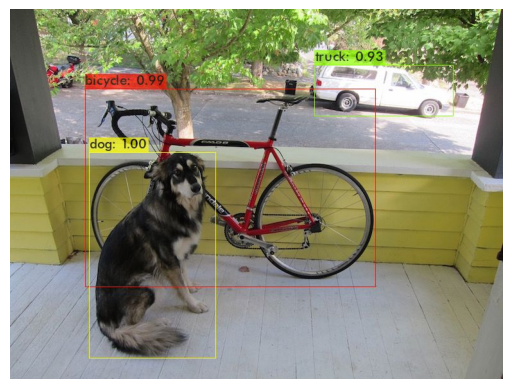

In [22]:
import cv2
from matplotlib import pyplot as plt

# Carregar a imagem resultante
image = cv2.imread('predictions.jpg')

# Converter a imagem de BGR para RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Exibir a imagem
plt.imshow(image)
plt.axis('off')
plt.show()
